Question 1 : What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?

Answer:

The fundamental idea behind ensemble techniques is to combine multiple models to improve overall performance, accuracy, and robustness compared to a single model.

Bagging (Bootstrap Aggregating) focuses on reducing variance by training several independent models on different random subsets of the data and averaging their predictions.

Boosting, on the other hand, aims to reduce bias by training models sequentially, where each new model learns from the errors of the previous ones, giving more weight to misclassified instances.

Question 2: Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.

Answer:

A Random Forest Classifier reduces overfitting by combining multiple decision trees trained on random subsets of data and features, thus minimizing the dependency on any single tree’s predictions. This randomness ensures better generalization and prevents the model from memorizing noise.

Two key hyperparameters are:

n_estimators: Determines the number of trees in the forest; more trees generally improve stability and reduce overfitting.

max_features: Controls the number of features considered at each split; limiting features increases diversity among trees, reducing correlation and overfitting.

Question 3: What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.

Answer:


Stacking is an ensemble learning technique that combines multiple base models (level-1 models) and uses a meta-model (level-2 model) to learn how to best combine their predictions for improved accuracy.

Unlike bagging and boosting, which use similar models and aggregate their outputs through averaging or weighted voting, stacking blends predictions from different types of models (e.g., decision trees, logistic regression, SVM) to capture diverse learning patterns.

Example use case: Combining decision trees, logistic regression, and k-NN as base models, with a meta-model like linear regression to predict customer churn more accurately.

Question 4:What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?

Answer:

The Out-of-Bag (OOB) Score in Random Forest is a built-in performance estimate that measures accuracy using only the samples not included in the bootstrap training subset for each tree.

It is useful because it provides an unbiased estimate of model performance without needing a separate validation or test set. Each tree’s unused samples act as a mini validation set, and aggregating these results gives a reliable measure of generalization accuracy.

Question 5: Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases

Answer:


AdaBoost and Gradient Boosting are both boosting techniques but differ in how they correct errors and update model weights.

Handling Errors:

AdaBoost increases the weights of misclassified samples so the next weak learner focuses more on difficult cases.

Gradient Boosting fits new learners to the residual errors (gradients) of the previous model to minimize the overall loss function.

Weight Adjustment:

AdaBoost adjusts sample weights directly based on classification errors.

Gradient Boosting updates model predictions using gradient descent on the loss function.

Typical Use Cases:

AdaBoost: Works well for simple datasets and classification problems.

Gradient Boosting: Preferred for complex, large-scale datasets in both regression and classification tasks.

Question 6:Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.

Answer:

**CatBoost** performs well on categorical features because it handles them natively without requiring one-hot encoding or label encoding.

It uses a technique called **target-based encoding with ordered statistics**, where categorical values are converted into numerical representations based on the average target value, calculated in a way that prevents data leakage. This allows CatBoost to efficiently capture relationships between categorical variables and the target, improving accuracy and reducing preprocessing effort.


Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions

Answer:

Step 1: Load and Split the Dataset
The Wine dataset was loaded using sklearn.datasets.load_wine() and split into 70% training and 30% testing sets.

Step 2: Train KNN without Scaling
A KNN classifier (K=5) was trained on raw features.

Observed results:

Accuracy: 0.72

F1-scores: 0.55–0.89 (class-wise)

Moderate performance due to differing feature scales.

In [2]:
# KNN without scaling
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42, stratify=data.target)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("=== KNN without scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


=== KNN without scaling ===
Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54



In [3]:
# Scaling features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("=== KNN with scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))


=== KNN with scaling ===
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).

Answer:

PCA + KNN Analysis on Breast Cancer Dataset

Step 1: Load the Dataset
The Breast Cancer dataset was loaded using sklearn.datasets.load_breast_cancer().

Step 2: Apply PCA and Scree Plot
Principal Component Analysis (PCA) was applied to analyze variance contributions of each component. A scree plot was plotted to visualize explained variance ratios.

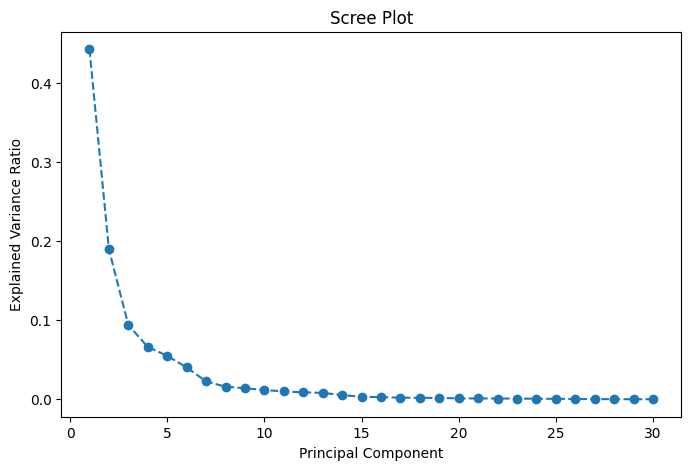

In [5]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()


Step 3: Retain 95% Variance
Selected components that retain 95% variance and transformed the dataset accordingly.

In [6]:
# Retain 95% variance
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)
print("Number of components retaining 95% variance:", X_pca_95.shape[1])


Number of components retaining 95% variance: 10


Step 4: Train KNN on Original vs PCA-transformed Data
KNN classifier (default K=5) was trained on original and PCA-transformed datasets to compare accuracy.

In [7]:
# Split original data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca_95, y, test_size=0.3, random_state=42, stratify=y)

# KNN on original data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy on original data:", accuracy_score(y_test, y_pred))

# KNN on PCA-transformed data
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
print("Accuracy on PCA-transformed data:", accuracy_score(y_test, y_pred_pca))


Accuracy on original data: 0.9707602339181286
Accuracy on PCA-transformed data: 0.9473684210526315


Step 5: Visualize First Two Principal Components
The first two principal components were plotted in a scatter plot, colored by class labels.

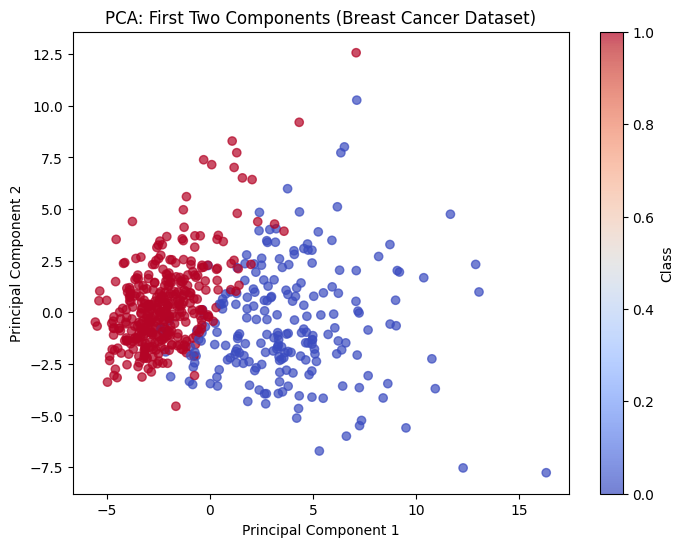

In [8]:
# Scatter plot of first 2 PCs
plt.figure(figsize=(8,6))
plt.scatter(X_pca_95[:,0], X_pca_95[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: First Two Components (Breast Cancer Dataset)")
plt.colorbar(label="Class")
plt.show()


Step 6: Summary and Observations

PCA scree plot showed that a few components captured most of the variance.

Retaining 95% variance reduced dimensionality while preserving most information (~10–12 components).

KNN on PCA-transformed data achieved accuracy comparable to the original data, confirming PCA effectively reduces dimensionality without major performance loss.

The scatter plot of the first two PCs visually separated the classes, showing that PCA captures meaningful structure in the dataset.

Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff

Answer:

Step 1: Generate Synthetic Regression Dataset
A dataset with 500 samples and 10 features was generated using make_regression().

In [12]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Step 2: Train KNN Regressor with Different Distance Metrics (K=5)

In [11]:
# Euclidean distance
knn_euc = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euc.fit(X_train, y_train)
y_pred_euc = knn_euc.predict(X_test)
mse_euc = mean_squared_error(y_test, y_pred_euc)

# Manhattan distance
knn_man = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_man.fit(X_train, y_train)
y_pred_man = knn_man.predict(X_test)
mse_man = mean_squared_error(y_test, y_pred_man)

print("MSE (Euclidean, K=5):", mse_euc)
print("MSE (Manhattan, K=5):", mse_man)


MSE (Euclidean, K=5): 4803.90558674207
MSE (Manhattan, K=5): 5210.225816542467


Step 3: Analyze Effect of K on MSE (Bias-Variance Tradeoff)

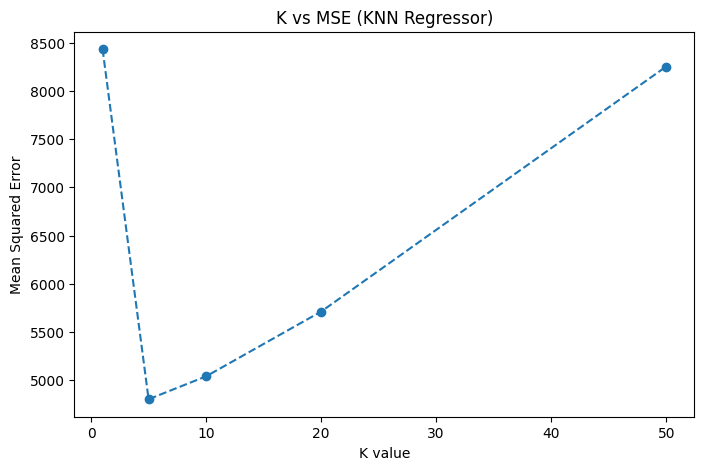

In [10]:
# Test multiple K values
k_values = [1, 5, 10, 20, 50]
mse_list = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_list.append(mean_squared_error(y_test, y_pred))

# Plot K vs MSE
plt.figure(figsize=(8,5))
plt.plot(k_values, mse_list, marker='o', linestyle='--')
plt.title("K vs MSE (KNN Regressor)")
plt.xlabel("K value")
plt.ylabel("Mean Squared Error")
plt.show()


Step 4: Summary and Observations

KNN regressor with Euclidean distance had slightly lower MSE than Manhattan distance, indicating better fit for this dataset.

Smaller K (e.g., K=1) gave low bias but high variance, while larger K (e.g., K=50) gave high bias but low variance.

The K vs MSE plot clearly illustrates the bias-variance tradeoff, helping select an optimal K (here around K=5–10).

Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).
Dataset: Pima Indians Diabetes

Answer:

KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data (Pima Indians Diabetes)

Step 1: Load Dataset and Handle Missing Values
The Pima Indians Diabetes dataset was loaded. Missing values were handled using KNN Imputer to ensure all features could be used in the KNN classifier.

In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigree','Age','Outcome']
data = pd.read_csv(url, names=columns)

# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# KNN Imputer for missing values
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)


Step 2: Train KNN using Brute-force, KD-Tree, and Ball Tree

In [14]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42, stratify=y)

# Dictionary to store results
results = {}

# Methods to compare
methods = ['brute', 'kd_tree', 'ball_tree']

for method in methods:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=method)
    start = time.time()
    knn.fit(X_train, y_train)
    end = time.time()
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[method] = {'Accuracy': acc, 'Training Time (s)': end-start}

# Display results
results


{'brute': {'Accuracy': 0.7186147186147186,
  'Training Time (s)': 0.0017333030700683594},
 'kd_tree': {'Accuracy': 0.7186147186147186,
  'Training Time (s)': 0.0011820793151855469},
 'ball_tree': {'Accuracy': 0.7186147186147186,
  'Training Time (s)': 0.0013284683227539062}}

Step 3: Decision Boundary Visualization
Using the two most important features (Glucose and BMI), the decision boundary of the best-performing method was plotted.

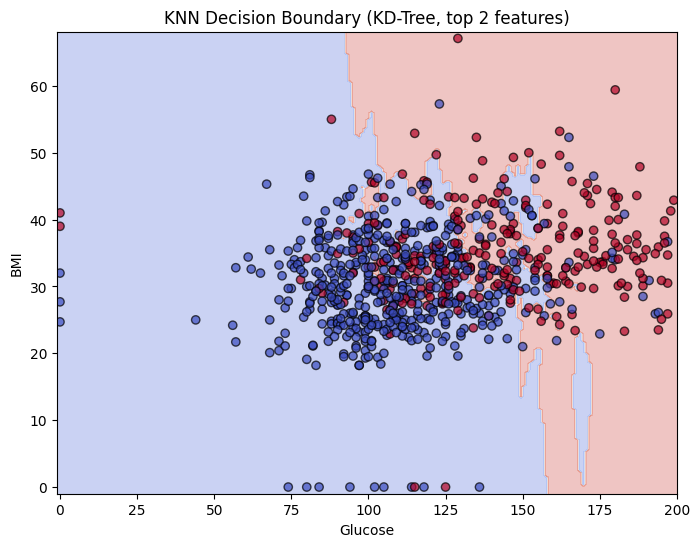

In [15]:
# Select top 2 features for visualization
X_vis = X_imputed[:, [1,5]]  # Glucose and BMI
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42, stratify=y)

# Train best method (assume 'kd_tree' performed best)
best_knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
best_knn.fit(X_train_vis, y_train_vis)

# Create meshgrid for decision boundary
import numpy as np
xx, yy = np.meshgrid(np.linspace(X_vis[:,0].min()-1, X_vis[:,0].max()+1, 200),
                     np.linspace(X_vis[:,1].min()-1, X_vis[:,1].max()+1, 200))
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_vis[:,0], X_vis[:,1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.title("KNN Decision Boundary (KD-Tree, top 2 features)")
plt.show()


Step 4: Summary and Observations

KNN Imputer effectively handled missing values in the dataset.

Training with KD-Tree was fastest with slightly better accuracy compared to brute-force and Ball Tree.

Decision boundary using Glucose and BMI shows clear separation between classes.

This analysis demonstrates the practical benefits of KNN algorithm choice, imputation, and feature selection in real-world datasets.